### Data Preparation Pipeline

Loading dataset

In [193]:
import pandas as pd

df = pd.read_csv("/Users/altemir_1/Desktop/Housing-Analysis/data/raw/astana_sale_raw_march_2025.csv")

df

,Unnamed: 0,Title,Price,Location,Link
0,0,2-комнатная квартира · 48.1 м² · 10/10 этаж,26 400 000〒,"Нура р-н, Айтматова — Мухамедханова",https://krisha.kz/a/show/760514087
1,1,3-комнатная квартира · 70 м² · 2/6 этаж,31 000 000〒,"Алматы р-н, Кажымукана 16",https://krisha.kz/a/show/699137309
2,2,1-комнатная квартира · 40.4 м² · 8/9 этаж,17 800 000〒,"Есильский р-н, Туран 89/3",https://krisha.kz/a/show/697594913
3,3,2-комнатная квартира · 75 м² · 4 этаж,51 000 000〒,"Есильский р-н, Кабанбай батыра — Рыскулова",https://krisha.kz/a/show/1000167913
4,4,1-комнатная квартира · 45 м² · 9/9 этаж,25 000 000〒,"Есильский р-н, Мангилик Ел 19/2",https://krisha.kz/a/show/699116404
...,...,...,...,...,...
19998,19998,4-комнатная квартира · 167.9 м² · 10/10 этаж,90 000 000〒,"Алматы р-н, ул. Ахмет Байтурсынова",https://krisha.kz/a/show/52422256
19999,19999,3-комнатная квартира · 66.5 м² · 5/5 этаж,30 000 000〒,"Алматы р-н, сатпаева 13/3",https://krisha.kz/a/show/761797657
20000,20000,3-комнатная квартира · 72 м² · 12/13 этаж,53 000 000〒,"Нура р-н, сыганак 24",https://krisha.kz/a/show/761587982
20001,20001,1-комнатная квартира · 30 м² · 1/6 этаж,14 500 000〒,"Есильский р-н, Кабанбай батыра 107",https://krisha.kz/a/show/692094979


In [194]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df 

,Title,Price,Location,Link
0,2-комнатная квартира · 48.1 м² · 10/10 этаж,26 400 000〒,"Нура р-н, Айтматова — Мухамедханова",https://krisha.kz/a/show/760514087
1,3-комнатная квартира · 70 м² · 2/6 этаж,31 000 000〒,"Алматы р-н, Кажымукана 16",https://krisha.kz/a/show/699137309
2,1-комнатная квартира · 40.4 м² · 8/9 этаж,17 800 000〒,"Есильский р-н, Туран 89/3",https://krisha.kz/a/show/697594913
3,2-комнатная квартира · 75 м² · 4 этаж,51 000 000〒,"Есильский р-н, Кабанбай батыра — Рыскулова",https://krisha.kz/a/show/1000167913
4,1-комнатная квартира · 45 м² · 9/9 этаж,25 000 000〒,"Есильский р-н, Мангилик Ел 19/2",https://krisha.kz/a/show/699116404
...,...,...,...,...
19998,4-комнатная квартира · 167.9 м² · 10/10 этаж,90 000 000〒,"Алматы р-н, ул. Ахмет Байтурсынова",https://krisha.kz/a/show/52422256
19999,3-комнатная квартира · 66.5 м² · 5/5 этаж,30 000 000〒,"Алматы р-н, сатпаева 13/3",https://krisha.kz/a/show/761797657
20000,3-комнатная квартира · 72 м² · 12/13 этаж,53 000 000〒,"Нура р-н, сыганак 24",https://krisha.kz/a/show/761587982
20001,1-комнатная квартира · 30 м² · 1/6 этаж,14 500 000〒,"Есильский р-н, Кабанбай батыра 107",https://krisha.kz/a/show/692094979


Splitting title into rooms, area and floor information

In [195]:
split_df = df["Title"].str.split("·", expand=True)

df["number_of_rooms"] = split_df[0]
df["area"] = split_df[1]
df["floor"] = split_df[2]

df.drop("Title", axis=1, inplace=True)

Price

In [196]:
df["Price"] = df["Price"].str.replace("〒", "", regex=False)
df["Price"] = df["Price"].str.replace("\xa0", "")
df["Price"] = df["Price"].str.replace("от", "")
df["Price"] = df["Price"].astype(int)

Area

In [197]:
df["area"] = df["area"].str.replace("м²", "")
df["area"] = df["area"].astype(float)

Number of Rooms

In [198]:
df["number_of_rooms"] = df["number_of_rooms"].str.replace("-комнатная квартира", "")
df["number_of_rooms"] = df["number_of_rooms"].astype(int)

Floor

In [199]:
split_floor_df = df["floor"].str.split("/", expand=True)
df["floor"] = split_floor_df[0]


np.int64(1212)

In [205]:
df.floor = df["floor"].str.replace(" ", "")
df.floor = df["floor"].str.replace("\xa0", "").str.replace("этаж","")
df.floor = df["floor"].str.replace("помесячно", "0")
df.floor.fillna(df.floor.mode()[0], inplace=True)

/var/folders/vx/qnjn5crx6n17qty1n6m8kf4w0000gn/T/ipykernel_45753/1383255438.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.floor.fillna(df.floor.mode()[0], inplace=True)


In [206]:
df.floor.isnull().sum()

np.int64(0)

In [207]:
df.floor = df.floor.astype(int)

District and Address

In [208]:
split_location_df = df["Location"].str.split(",", expand=True)
df["district"] = split_location_df[0]
df["adress"] = split_location_df[1]

In [212]:
# Define your valid districts list
valid_districts = [
    "Есильский р-н", "Сарыарка р-н", "Алматы р-н", "Нура р-н", "р-н Байконур", "Сарайшык р-н"
]

# Function to fix district and address columns
def fix_district_and_address(row):
    if row['district'] not in valid_districts and pd.isna(row['adress']):
        # Move the 'district' value to 'adress'
        row['adress'] = row['district']
        # Replace 'district' value with 'Unknown District'
        row['district'] = "Unknown District"
    return row

# Apply the function to every row in the DataFrame
df = df.apply(fix_district_and_address, axis=1)

In [216]:
df.adress.fillna("unknown", inplace=True)

Checking for null values

In [217]:
df.isnull().sum()

Price              0
Location           0
Link               0
number_of_rooms    0
area               0
floor              0
district           0
adress             0
dtype: int64

Deleteing unnecessary columns and renaming for convention

In [218]:
df.rename(columns={"Price": "price", "Link": "link", "adress": "address"}, inplace=True)
df.drop("Location", axis=1, inplace=True)
df

,price,link,number_of_rooms,area,floor,district,address
0,26400000,https://krisha.kz/a/show/760514087,2,48.1,10,Нура р-н,Айтматова — Мухамедханова
1,31000000,https://krisha.kz/a/show/699137309,3,70.0,2,Алматы р-н,Кажымукана 16
2,17800000,https://krisha.kz/a/show/697594913,1,40.4,8,Есильский р-н,Туран 89/3
3,51000000,https://krisha.kz/a/show/1000167913,2,75.0,4,Есильский р-н,Кабанбай батыра — Рыскулова
4,25000000,https://krisha.kz/a/show/699116404,1,45.0,9,Есильский р-н,Мангилик Ел 19/2
...,...,...,...,...,...,...,...
19998,90000000,https://krisha.kz/a/show/52422256,4,167.9,10,Алматы р-н,ул. Ахмет Байтурсынова
19999,30000000,https://krisha.kz/a/show/761797657,3,66.5,5,Алматы р-н,сатпаева 13/3
20000,53000000,https://krisha.kz/a/show/761587982,3,72.0,12,Нура р-н,сыганак 24
20001,14500000,https://krisha.kz/a/show/692094979,1,30.0,1,Есильский р-н,Кабанбай батыра 107


Saving final variant

In [219]:
df.to_csv("astan_sale_cleaned_march_2025.csv", index=False)

### Feature distribution and outliers

Feature distribuions

In [ ]:
import pandas as pd
df = pd.read_csv("/Users/altemir_1/Desktop/Housing-Market-Analysis-in-Astana/data/processed/astan_rent_cleaned_march_2025.csv")
df.head()

,price,link,number_of_rooms,area,floor,district,address
0,130000,https://krisha.kz/a/show/760402765,1,40.0,0,Есильский р-н,Е-15 3
1,250000,https://krisha.kz/a/show/698600297,3,90.0,6,Сарыарка р-н,Сарыарка 31/2
2,120000,https://krisha.kz/a/show/698333334,2,30.0,4,Сарыарка р-н,Республика 76 — ЖД Вокзал старый
3,170000,https://krisha.kz/a/show/682941229,1,36.0,2,Нура р-н,Чингиз Айтматов 60/1
4,400000,https://krisha.kz/a/show/761561653,4,160.0,18,Есильский р-н,Динмухаммед Кунаев


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8424 non-null   int64  
 1   link             8424 non-null   object 
 2   number_of_rooms  8424 non-null   int64  
 3   area             8424 non-null   float64
 4   floor            8424 non-null   int64  
 5   district         8424 non-null   object 
 6   address          8424 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 460.8+ KB


In [ ]:
df.describe()

,price,number_of_rooms,area,floor
count,8.424000e+03,8424.000000,8424.000000,8424.000000
mean,3.416339e+05,1.944088,67.778812,6.445988
std,3.615316e+05,0.988517,44.880339,4.698375
min,4.000000e+04,1.000000,7.000000,0.000000
25%,1.800000e+05,1.000000,40.400000,3.000000
50%,2.300000e+05,2.000000,53.000000,5.000000
75%,3.300000e+05,2.000000,75.000000,9.000000
max,6.000000e+06,9.000000,580.000000,41.000000


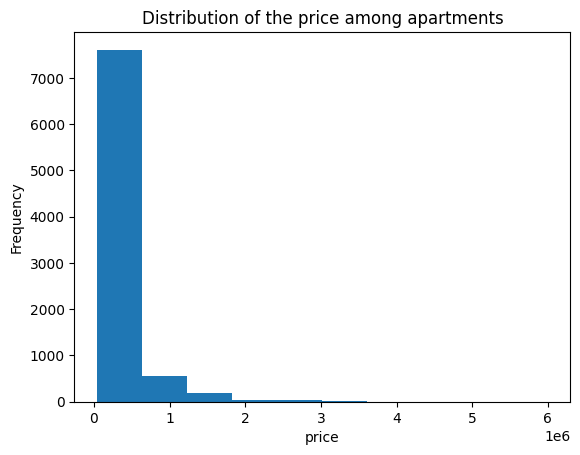

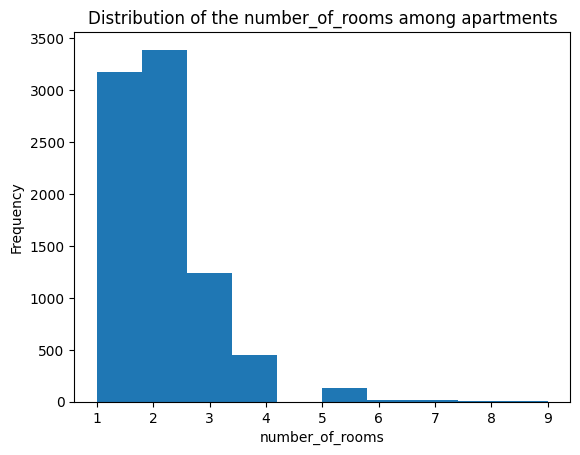

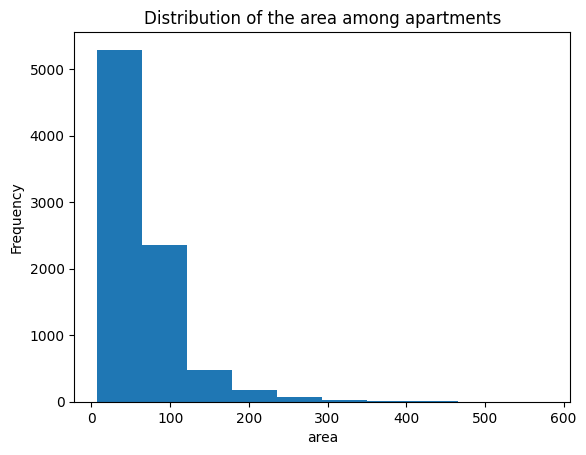

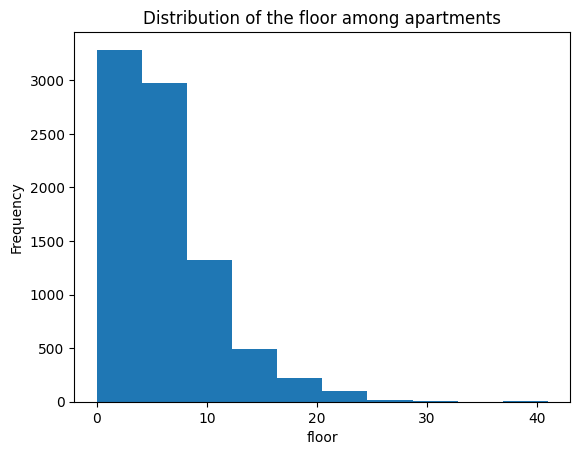

In [ ]:
import matplotlib.pyplot as plt

columns = ["price", "number_of_rooms", "area", "floor"]
for column in columns:
        
    plt.hist(df[column])
    plt.xlabel(f"{column}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of the {column} among apartments")
    plt.show()

Object features distribution

In [ ]:
df["district"].value_counts()

district
Есильский р-н                                4214
Алматы р-н                                   1912
Нура р-н                                      913
Сарыарка р-н                                  628
Unknown District                              376
р-н Байконур                                  257
Сарайшык р-н                                  116
Е54 5 — Туран 65а. Сзади Смолла                 1
Туран 44Б — Астана арена                        1
Бектурова 4/1 — От 14 дней-210 тыс. Центр       1
Азильхан Нуршаихов                              1
Лесная Поляна                                   1
Мукан Тулебаев 5 — Обаган                       1
Сарайшык 34 — Акмешит                           1
Ташенова 13/2 — Бараева                         1
Name: count, dtype: int64

In [ ]:
df["address"].value_counts()

address
мкр Комсомольский                                                                                                                     128
мкр Пригородный                                                                                                                        35
Байтурсынова 9                                                                                                                         34
Улы Дала 33/1                                                                                                                          31
Калдаякова 3                                                                                                                           31
                                                                                                                                     ... 
Аль-Фараби 27/1 — Кекильбаева                                                                                                           1
Кошкарбаева 2 — Блок С 4  

In [ ]:
valid_districts = ["Есильский р-н", "Алматы р-н", "Нура р-н", "Сарыарка р-н", "р-н Байконур", "Сарайшык р-н"]

df = df[df["district"].isin(valid_districts)]


Deleting rows from above range

In [ ]:
treshold = df["price"].quantile(0.98)
filtered_df = df[df["price"] <= treshold]
sorted_df = filtered_df.sort_values(by="price", ascending=False)
sorted_df


,price,link,number_of_rooms,area,floor,district,address
5332,1500000,https://krisha.kz/a/show/699839923,5,500.0,8,Есильский р-н,Сыганак 39/1
6810,1500000,https://krisha.kz/a/show/694929176,3,130.0,7,Есильский р-н,Гейдар Алиева 2
7501,1500000,https://krisha.kz/a/show/699864678,4,230.0,15,Алматы р-н,Байтурсынова 5
4178,1500000,https://krisha.kz/a/show/662126863,5,203.0,29,Алматы р-н,Ахмета Байтурсынова 9 — проспект Тауелсиздик
2302,1500000,https://krisha.kz/a/show/691235683,4,160.0,4,Есильский р-н,Кайым Мухамедханов 1/2
...,...,...,...,...,...,...,...
5546,50000,https://krisha.kz/a/show/762311780,3,136.0,1,р-н Байконур,Иманбаева 1
3463,50000,https://krisha.kz/a/show/48151536,1,18.2,0,Сарыарка р-н,Аулие ата 66
6951,45000,https://krisha.kz/a/show/761250115,1,15.0,1,Сарыарка р-н,Атбасар
3392,45000,https://krisha.kz/a/show/686128642,1,18.0,2,Сарыарка р-н,Ушкара


In [ ]:
sorted_df.to_csv("astana_rent_for_visual.csv", index=False)